In [1]:
import os

os.chdir("../dist/")
%pip install plan4grid-0.0.5-py3-none-any.whl
os.chdir("..")
from plan4grid import Launcher

Processing d:\aiplan4grid\dist\plan4grid-0.0.5-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.
plan4grid is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
env_name = "educ_case14_storage"
scenario_id = 2
tactical_horizon = 5
debug = False


Running the agent on scenario 2 for 57 steps of 25 minutes.



Steps:  81%|████████  | 46/57 [00:41<00:09,  1.11it/s]



Total reward: 707.5101308822632


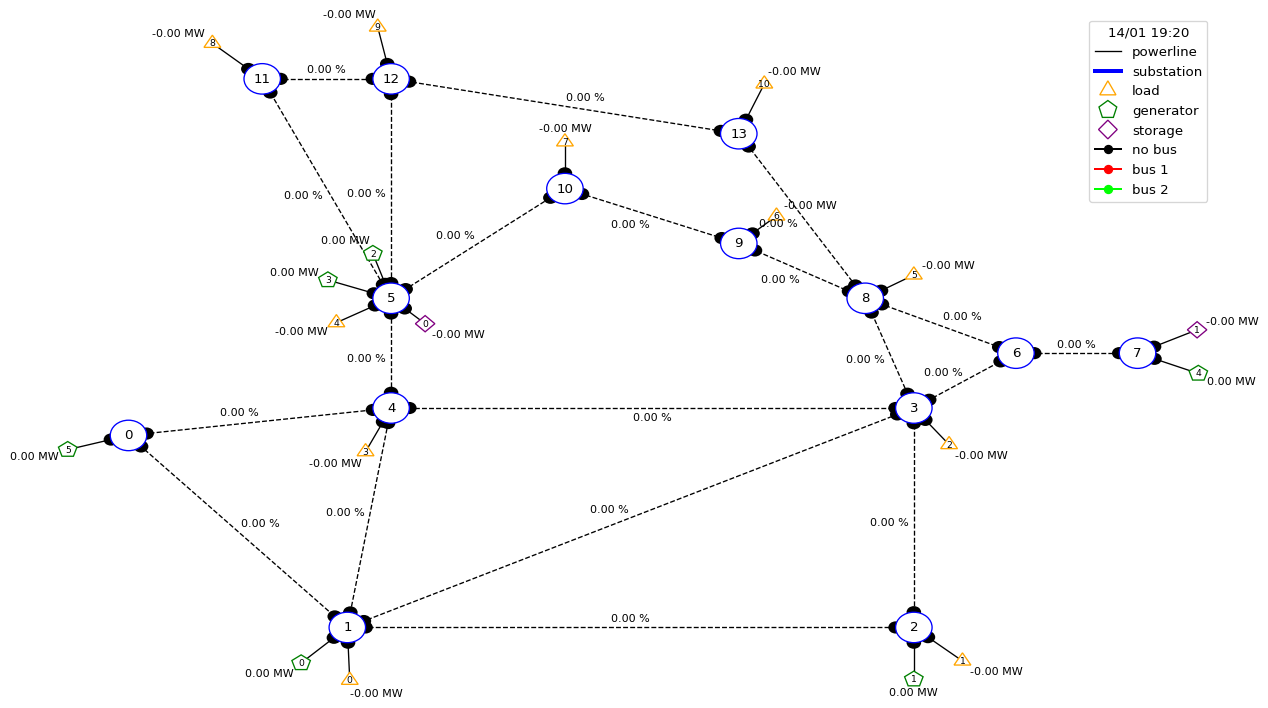

Logs are available in D:\AIPlan4Grid\log\AIPlan4GridAgent.log


In [3]:
launcher = Launcher(env_name, scenario_id, tactical_horizon, debug=debug)
launcher.launch()